# <b>Google Play Store Data - Mobile Applications and Reviews

There are two files- <ul><li><b>app_info.csv </b>- details of the applications on Google Play. </li><li><b>app_reviews.csv</b> - This file contains the first 'most relevant' 100 reviews for each app. <>/li>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Reading data

In [2]:
df_appinfo = pd.read_csv('E:/My Work/Data/app_info.csv')

In [3]:
df_appreviews = pd.read_csv('E:/My Work/Data/app_reviews.csv')

# Data Exploration and Cleaning (App_info)

There are 10,841 rows and 13 columns in app_info dataset.

In [4]:
df_appinfo.shape

#Sample records
df_appinfo.head(3)

#Datatypes of each column
df_appinfo.dtypes

(10841, 13)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Each row represents an application (App) data in play store.<br>

Column:			Description <br>
App		:	Application name <br>
Category:		Category the app belongs to <br>
Rating	:		Overall user rating of the app (as when scraped) <br>
Reviews	:	Number of user reviews for the app (as when scraped)<br>
Size	:		Size of the app (as when scraped)<br>
Installs:			Number of user downloads/installs for the app (as when scraped)<br>
Type	:		Paid or Free<br>
Price	:		Price of the app (as when scraped)<br>
Content Rating:		Age group the app is targeted at - Children / Mature 21+ / Adult<br>
Genres			:An app can belong to multiple genres (apart from its main category).
For eg, a musical family game will belong to Music, Game, Family genres.<br>
Last Updated:		Date when the app was last updated on Play Store (as when scraped)<br>
Current Ver	:	Current version of the app available on Play Store (as when scraped)<br>
Android Ver	:	Min required Android version (as when scraped)<br>

Only Rating column is of type numeric in orginal dataframe. It ranges from 1 to 19. Value 19 seems to be off. There is only one record with that value.

In [5]:
df_appinfo.describe()
df_appinfo[df_appinfo.Rating==19]

,Rating
count,9367.00
mean,4.19
std,0.54
min,1.00
25%,4.00
50%,4.30
75%,4.50
max,19.00


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<b>Categories

There are 34 categories.

In [6]:
df_appinfo.Category.nunique()

print('Number of records in each Categories:')
df_appinfo.Category.value_counts()

34

Number of records in each Categories:


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Category '1.9' doesnt seems right. It seems to be a typo. 
Need to correctly classify or remove it. <br>

In [7]:
df_appinfo[df_appinfo.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


If you look at the above record, Category columns should be NAN. Data is shifted one column towards their left. I mean 1.9 should be Rating, 19 should be Reviews, 3.0M should be Size, Type should be Free like that. Therefore, correcting this one record by shifting the columns.

In [8]:
df_appinfo.iloc[10472,1:] = df_appinfo.iloc[10472,1:].shift(periods=1)

In [9]:
df_appinfo.iloc[10472,1] = 'HOUSE_AND_HOME'

In [10]:
#df_appinfo[df_appinfo.Category=='1.9']
df_appinfo.iloc[10472:10473,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,HOUSE_AND_HOME,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


<b>Size</b> - Contains K, M, 'Varies with device' strings along with numbers. - NEED TO CONVERT IT TO NUMBER.

Setting Size as -99 for now for the records where the Size is mentioned as 'Varies with device'. This value is later changed with corresponding Category's mean.

In [11]:
df_appinfo.loc[df_appinfo.Size == 'Varies with device','Size']='-99'

In [12]:
#df_appinfo[df_appinfo.Size != 'Varies with device']
df_appinfo.Size = df_appinfo.Size.apply(lambda a: 
                      float(a[:-1])*1000000 if ('M' or 'm') in a else 
                          (float(a[:-1])*1000 if ('k' or 'K') in a else float(a))
                     )

In [13]:
dict_Catergory_Size_Mean = (df_appinfo.loc[(df_appinfo.Size != -99)].groupby('Category')['Size'].mean()).to_dict()
df_appinfo.loc[(df_appinfo.Size == -99),'Size'] = df_appinfo.loc[(df_appinfo.Size == -99)]['Category'].apply(lambda a: dict_Catergory_Size_Mean.get(a,np.NaN))

<b>Price

Price contains $ signs.

In [14]:
df_appinfo.Price.value_counts().head()

0        10041
$0.99      148
$2.99      129
$1.99       73
$4.99       72
Name: Price, dtype: int64

Remove $ sign from the price and converting the values to float.

In [15]:
df_appinfo.Price = df_appinfo.Price.apply(lambda a: float(a[1:]) if '$' in a else float(a))

In [16]:
df_appinfo.Price.value_counts().head()

0.00    10041
0.99      148
2.99      129
1.99       73
4.99       72
Name: Price, dtype: int64

<b>Number of Apps covered in the dataset.

In [17]:
print('Number of Apps covered in the dataset:')
df_appinfo.App.nunique()

Number of Apps covered in the dataset:


9660

Number of records for each APP. <br>

In [18]:
print('Number of records for each APP')
df_appinfo.App.value_counts().head()

Number of records for each APP


ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
Name: App, dtype: int64

Why we have more than one record for certain(798) Apps? This could be because of below reasons:
<ol><li> Duplicate records.</li>
    <li><b> Data was retrieved multiple times (different timestamp).</li></ol>

Example 1 - ESPN<br>
Except Reviews, almost all other columns are same. It indicates that the data for an app is retrieved multiple times (on different timestamp). We can observe that reviews are increasing. We don't have information related to retrieval time i.e. when the data for an app retrieved from Play Store.

Here I will assume that the user cannot delete their Reviews in the Play Store once posted. Hence, the row with highest number of reviews is the most recent data for that App. As one App data is new as compared to other app data, comparisions between them won't be right. Example: For ESPN App I retrieved there latest data (Jan 2020) from Play store while for other App (say ROBLOX), I have previous data i.e. from Jan 2016. Comparision between these two Apps in two different times is not right. Over the period of 4 years ESPN will have more number of installs etc. We need to compare data for the same time. This is a major drawback in the anaysis. In order to reduce such differences, out of all the records for an App, I will keep only that record which has minimum reviews. Considering that was the first time App data pulled for all the Apps. 

Also, note - index 2959, 3010, 3018 are exactly same. This is considered as duplicates.

In [19]:
df_appinfo[df_appinfo.App == 'ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.20,521138,24339012.86,"10,000,000+",Free,0.00,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.20,521138,24339012.86,"10,000,000+",Free,0.00,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.20,521138,24339012.86,"10,000,000+",Free,0.00,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.20,521140,24339012.86,"10,000,000+",Free,0.00,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.20,521140,24339012.86,"10,000,000+",Free,0.00,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.20,521140,24339012.86,"10,000,000+",Free,0.00,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.20,521081,24339012.86,"10,000,000+",Free,0.00,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


Example 2- Except Reviews and Category, almost all other columns are same. It indicates that the data for an app is retrieved multiple times (on different timestamp).

In [20]:
df_appinfo[df_appinfo.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.50,4447388,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.50,4447346,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.50,4448791,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.50,4449882,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.50,4449910,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.50,4449910,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.50,4450855,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.50,4450890,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.50,4443407,67000000.00,"100,000,000+",Free,0.00,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


There are multiple records for certain Apps. Keep only minimum reviews record for each app. Why? Reason is disussed above.

In [21]:
df_appinfo['Min_Reviews'] = df_appinfo.groupby('App')['Reviews'].transform(min)
df_appinfo = df_appinfo[df_appinfo.Reviews == df_appinfo.Min_Reviews]

Drop Duplicate Records.

In [22]:
print('Before Droping')
df_appinfo.shape
df_appinfo.drop_duplicates(inplace=True)

print('After Droping')
df_appinfo.shape

Before Droping


(10051, 14)

After Droping


(9667, 14)

<b>Installs

In [23]:
df_appinfo['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Installs - Remove non numeric values like '+' and ','.

In [24]:
remove_values = ['+', ',']
def removePuncStr(s):
    for c in remove_values:
        s = s.replace(c,"")
    return s

In [25]:
df_appinfo['Installs'] = df_appinfo.Installs.apply(lambda a: int(removePuncStr(a)))
df_appinfo['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

Check for NA in the data.

In [26]:
df_appinfo.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Min_Reviews          0
dtype: int64

In [27]:
df_appinfo.Rating = df_appinfo.Rating.astype('float64')

In [28]:
dict_category_wise_mean_rating = df_appinfo.groupby('Category')['Rating'].mean()
df_appinfo.loc[(df_appinfo.Rating.isna()),'Rating'] = df_appinfo.loc[(df_appinfo.Rating.isna())]['Category'].apply(lambda a: dict_category_wise_mean_rating.get(a,np.NaN))

In [29]:
df_appinfo.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
Min_Reviews       0
dtype: int64

In [30]:
df_appinfo.Reviews = df_appinfo.Reviews.astype('int64')

In [31]:
df_appinfo.describe()

,Rating,Reviews,Size,Installs,Price
count,9667.00,9667.00,9667.00,9667.00,9667.00
mean,4.17,216519.24,20246784.18,7789339.96,1.10
std,0.50,1829953.35,20628176.16,53746146.03,16.84
min,1.00,0.00,8500.00,0.00,0.00
25%,4.00,25.00,5300000.00,1000.00,0.00
50%,4.20,969.00,13124245.61,100000.00,0.00
75%,4.50,29473.50,27000000.00,1000000.00,0.00
max,5.00,78128208.00,100000000.00,1000000000.00,400.00


In [32]:
df_appinfo.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Min_Reviews        object
dtype: object

<b>Number of Applications by Categories.

Text(0.5,0,'Categories')

Text(0,0.5,'Number of Applications')

Text(0.5,1,'Number of applications by categories')

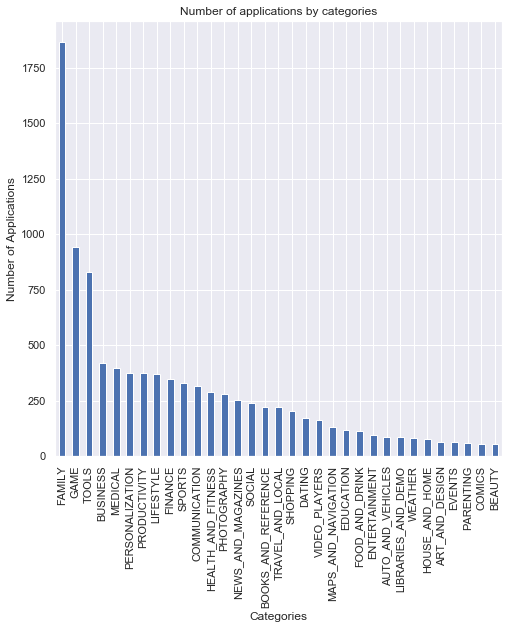

In [33]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Applications')
ax.set_title('Number of applications by categories')
df_appinfo.Category.value_counts().plot.bar(ax=ax)

Out of 9660 applications, 1972 (~20%) of the application are from Family Category.<br>

<b>Most of the Ratings are between 4 nd 4.5.

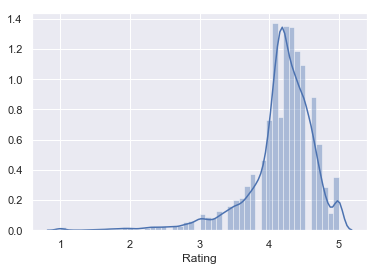

In [34]:
sns.distplot(df_appinfo.Rating)

Text(0.5,1,'Box plots of auto engine size by fule type')

Text(0.5,0,'Category')

Text(0,0.5,'Rating')

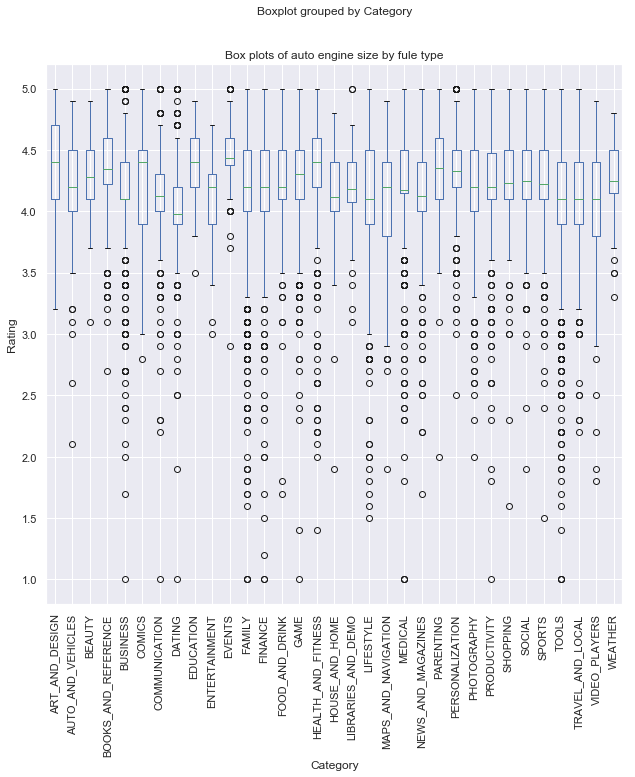

In [35]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
df_appinfo[['Category','Rating']].boxplot(by = 'Category', ax = ax, rot=90) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Rating')# Set text for y axis

Dating (categories) apps gets average lowest ratings by the users i.e. avrage 4.0. <br>
Comics, Events and Arts & Designs (Categories) Apps gets avrage highest ratings.<br>

<b> Which type of applications are in the dataset.

Text(0.5,0,'Type')

Text(0,0.5,'Number of Applications')

Text(0.5,1,'Number of applications by Types')

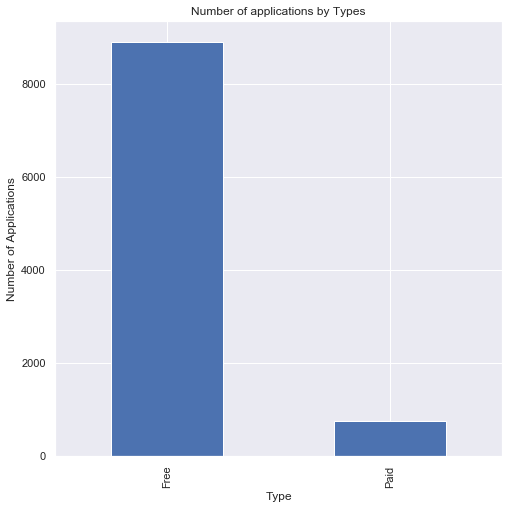

In [36]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()
ax.set_xlabel('Type')
ax.set_ylabel('Number of Applications')
ax.set_title('Number of applications by Types')
df_appinfo.Type.value_counts().plot.bar(ax=ax)

The majority of the applocations are Free Apps.<br>

<b> What Category of Apps are Installed the most/least?

Text(0.5,0,'Installs')

Text(0,0.5,'Number of Installs')

Text(0.5,1,'Number of Installs by Category')

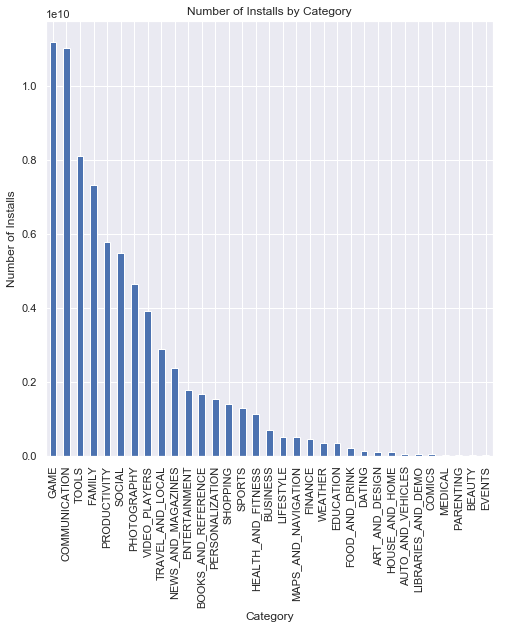

In [37]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()
ax.set_xlabel('Installs')
ax.set_ylabel('Number of Installs')
ax.set_title('Number of Installs by Category')
df_appinfo.groupby('Category').Installs.sum().sort_values(ascending=False).plot.bar(ax=ax)

Game and Communication Apps are Installed most. Events and Beauty apps are installed least. If the number of applications in the category is high then the number of installs in that vategory is also high. Instead of sum let's check for average install in each category. <br>
<b> Average Installation by Category.

In [38]:
#df_appinfo['Num_of_Apps_in_Category'] = df_appinfo.groupby('Category').App.transform('count')

Text(0.5,0,'Installs')

Text(0,0.5,'Average Number of Installs')

Text(0.5,1,'Average Number of Installs by Category')

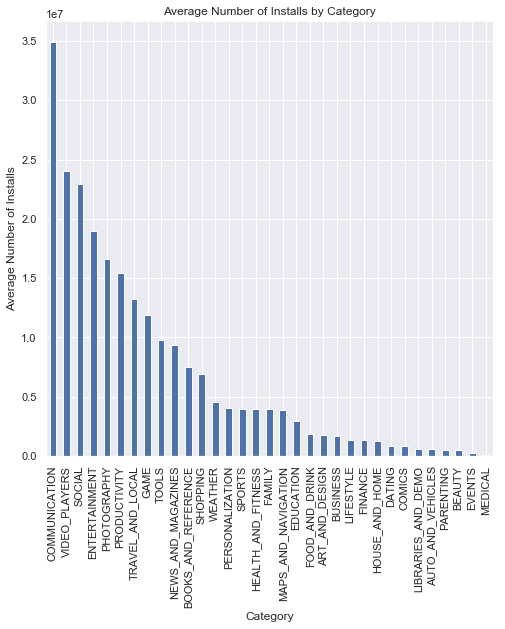

In [39]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()
ax.set_xlabel('Installs')
ax.set_ylabel('Average Number of Installs')
ax.set_title('Average Number of Installs by Category')
df_appinfo.groupby('Category').Installs.mean().sort_values(ascending=False).plot.bar(ax=ax)

Communication and Video_Palyers categories have highest number of average installs. This means each apps in these categories have higher installations.

<b>Ratings of the top 10 applications which have the most installs.

In [84]:
print('Ratings of the top 10 applications which have the most installs')
df_appinfo[['App','Rating','Installs']].sort_values(by = ['Installs','Rating'], ascending=False).head(10)

Ratings of the top 10 applications which have the most installs


,App,Rating,Installs
3896,Subway Surfers,4.50,1000000000
3909,Instagram,4.50,1000000000
5395,Google Photos,4.50,1000000000
3904,WhatsApp Messenger,4.40,1000000000
4150,Google,4.40,1000000000
4170,Google Drive,4.40,1000000000
340,Gmail,4.30,1000000000
865,Google Play Games,4.30,1000000000
3928,YouTube,4.30,1000000000
3996,Google Chrome: Fast & Secure,4.30,1000000000


# Data Exploration and Cleaning (App_Review dataset)

In [40]:
print('App_reviews (rows,col)')
df_appreviews.shape

print('Number of unique Apps:')
len(df_appreviews.groupby('App')['App'].count())

App_reviews (rows,col)


(64295, 5)

Number of unique Apps:


1074

Each record is a app review.

In [41]:
df_appreviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.29
2,10 Best Foods for You,NaN,NaN,nan,nan
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.88
4,10 Best Foods for You,Best idea us,Positive,1.00,0.30


In [42]:
df_appreviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are 5 records where Translated_Review is NaN but corresponding Sentiment, Sentiment_Polarity and Sentiment_Subjectiivety is specified.

In [43]:
df_appreviews[(df_appreviews.Translated_Review.isna()==True) & (df_appreviews.Sentiment.isna()==False)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.00,0.00
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.00,0.00
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.00,0.00
31623,DC Comics,NaN,Neutral,0.00,0.00
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.00,0.00


NaN's cannot be classified into Positive, Negatuve or Neutral. It is UNKNOWN.. Drop all the rows where Translated_Review is NaN.

In [44]:
df_appreviews = df_appreviews[df_appreviews.Translated_Review.isna()==False]

print('App_reviews (rows,col) after dropping rows where Translated_Review is NaN')
df_appreviews.shape

print('Number of unique Apps after dropping rows where Translated_Review is NaN:')
len(df_appreviews.groupby('App')['App'].count())

App_reviews (rows,col) after dropping rows where Translated_Review is NaN


(37427, 5)

Number of unique Apps after dropping rows where Translated_Review is NaN:


865

Again check for Null Values.

In [45]:
df_appreviews.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

There are more positive reviews then negative or neutral reviews.

Text(0.5,0,'Sentiment')

Text(0,0.5,'Count')

Text(0.5,1,'Count of Apps by Sentiment')

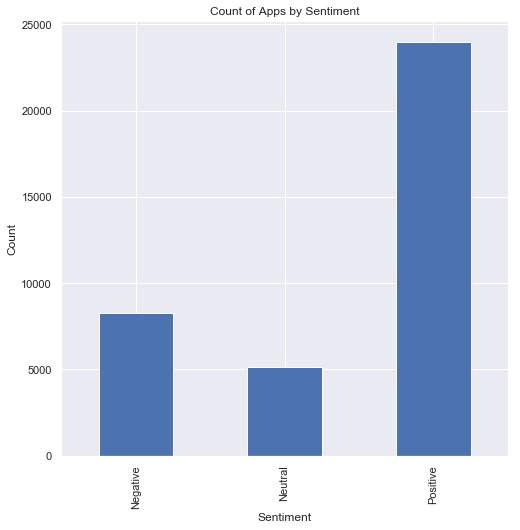

In [63]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Count of Apps by Sentiment')
df_appreviews.groupby('Sentiment').App.count().plot.bar(ax=ax)

Dummy Varibles

In [64]:
df_appreviews['Positive'] = df_appreviews.Sentiment == 'Positive'
df_appreviews['Negative'] = df_appreviews.Sentiment == 'Negative'
df_appreviews['Neutral'] = df_appreviews.Sentiment == 'Neutral'

In [65]:
df_review_final = df_appreviews.groupby('App')[['Positive','Negative','Neutral']].mean().reset_index()

#Multiply by 100 to convert it to %
df_review_final[['Positive', 'Negative','Neutral']] = df_review_final[['Positive', 'Negative','Neutral']]*100 

In [66]:
#Sorting
df_review_final.sort_values(['Positive', 'Negative','Neutral','App'], ascending=False)

,App,Positive,Negative,Neutral
846,HomeWork,100.00,0.00,0.00
845,"Home workouts - fat burning, abs, legs, arms,c...",100.00,0.00,0.00
761,Google+,100.00,0.00,0.00
759,Google Trips - Travel Planner,100.00,0.00,0.00
758,Google Translate,100.00,0.00,0.00
756,Google Slides,100.00,0.00,0.00
755,Google Primer,100.00,0.00,0.00
701,GPS Speedometer and Odometer,100.00,0.00,0.00
700,GPS Map Free,100.00,0.00,0.00
630,FlipaClip - Cartoon animation,100.00,0.00,0.00


As there are more than 850 Apps, Showcasing all of them in a graph will create clutter. Therefore, just showing first few of them.

[Text(0,0.5,'%'), Text(0.5,0,'App Name')]

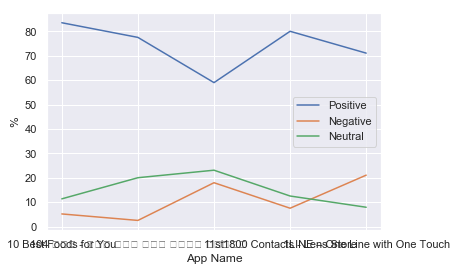

In [72]:
df_small = df_review_final.iloc[:5]
ax = sns.lineplot(x="App", y="Positive", data=df_small, label = 'Positive', legend='full')
ax = sns.lineplot(x="App", y="Negative", data=df_small, label = 'Negative', legend='full')
ax = sns.lineplot(x="App", y="Neutral", data=df_small, label = 'Neutral', legend='full')
ax.set(xlabel='App Name', ylabel='%')

Same information in Bar plot.

Text(0.5,0,'App')

Text(0,0.5,'Average %')

Text(0.5,1,'Apps Mean Positive, Negative and Neutral Scores')

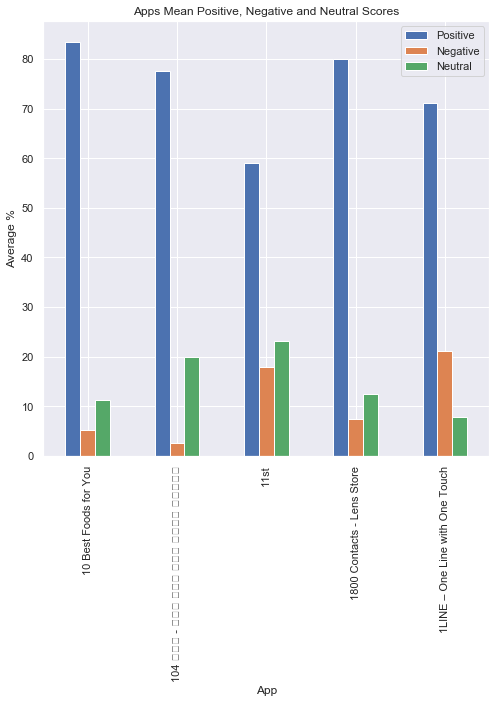

In [83]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()
ax.set_xlabel('App')
ax.set_ylabel('Average %')
ax.set_title('Apps Mean Positive, Negative and Neutral Scores')
df_small.groupby('App').mean().plot.bar(ax=ax)

# Combining Data Frames (AppInfo and AppReviews)

In [88]:
df_review_final.App.nunique()
df_appinfo.App.nunique()

865

9660

Combining two dataframe into one.

In [86]:
df_combined = pd.merge(df_appinfo,df_review_final, on='App', how='outer')
df_combined.App.nunique()

9709

In [89]:
#Cross-Chek
#df_combined[df_combined.App == '10 Best Foods for You']
#df_appinfo[df_appinfo.App == '10 Best Foods for You']
#df_review_final[df_review_final.App == '10 Best Foods for You']
df_combined.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Min_Reviews,Positive,Negative,Neutral
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,19000000.00,10000.00,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159,nan,nan,nan
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,14000000.00,500000.00,Free,0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967,59.09,31.82,9.09


Category Wise App Reviews.

Text(0.5,0,'Category')

Text(0,0.5,'Average %')

Text(0.5,1,'Category Wise Sentiments Scores')

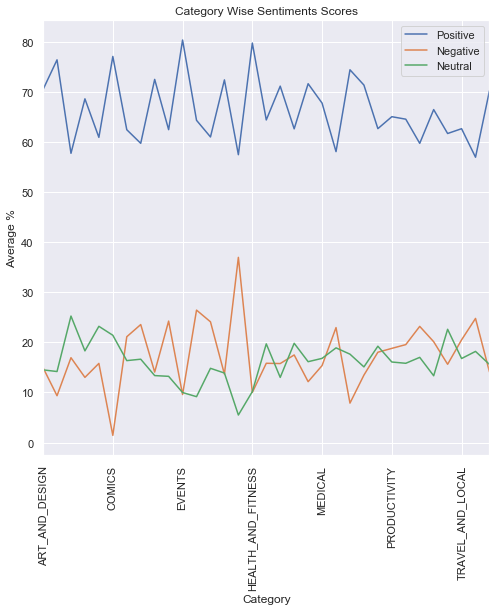

In [111]:
fig = plt.figure(figsize=(8,8))
ax= fig.gca()
ax.set_xlabel('Category')
ax.set_ylabel('Average %')
ax.set_title('Category Wise Sentiments Scores')
df_combined[['Category','Positive','Negative', 'Neutral']].groupby('Category').mean().plot(ax=ax, rot=90)

The positive reviews across categories ranges from ~60% to ~80%.<br>
The negative reviews across categories ranges from ~1% to ~38%.<br>
The neutral reviews across categories ranges from ~5% to ~25%.<br>
<br>
The Game Category has highest mean negative score and almost lowest postive score. This indicates that the Game category is challenging in terms of users satisfaction. Users are not very mush satisfied.

<b> If a company is looking to develop the next top trending application on the Google Play Store, what kind of app should they focus on building? Why? (ie. does number of installs correlate with a higher rating? Or perhaps number of reviews, or overall sentiment?) Present the data findings to back your claim. Use notebook for both results and explanation.

In [112]:
df_combined_dummies = pd.get_dummies(df_combined,columns=['Category','Type', 'Content Rating'])

Uncomment below code to view the Correlation_matrix on all the columns.

X = df_combined_dummies[['Installs', 'Rating','Reviews', 'Size','Price', 
                 'Category_ART_AND_DESIGN','Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
                 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
                 'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
                 'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
                 'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
                 'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
                 'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
                 'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
                 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
                 'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
                 'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
                 'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
                 'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Type_Paid',
                 'Content Rating_Adults only 18+', 'Content Rating_Everyone',
                 'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
                 'Content Rating_Teen', 'Content Rating_Unrated',
                        'Positive', 'Negative', 'Neutral',]]
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

In [113]:
X = df_combined_dummies[['Installs', 'Rating','Reviews', 'Size','Price', 
                 'Category_COMMUNICATION',
                         'Category_TRAVEL_AND_LOCAL',
                 'Category_ENTERTAINMENT', 'Category_GAME',
                'Category_PHOTOGRAPHY',
                 'Category_PRODUCTIVITY', 'Category_SOCIAL',
                 'Category_VIDEO_PLAYERS', 'Type_Free',
                 'Content Rating_Teen', 'Positive', 'Negative', 'Neutral']]
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Installs,Rating,Reviews,Size,Price,Category_COMMUNICATION,Category_TRAVEL_AND_LOCAL,Category_ENTERTAINMENT,Category_GAME,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SOCIAL,Category_VIDEO_PLAYERS,Type_Free,Content Rating_Teen,Positive,Negative,Neutral
Installs,1,0.040308,0.625039,0.0420317,-0.00940555,0.0928498,0.0153806,0.0207028,0.025154,0.028292,0.0286933,0.044949,0.0395765,0.0418044,0.0523384,-0.0431461,0.0971842,-0.062318
Rating,0.040308,1,0.0550838,0.0580508,-0.019524,-0.0188996,-0.0315865,-0.0110631,0.0471323,-0.00574999,0.0044599,0.0240631,-0.0341113,-0.0453924,0.0358938,0.321744,-0.193836,-0.209065
Reviews,0.625039,0.0550838,1,0.0765438,-0.00758772,0.0691139,-0.00782711,0.00176914,0.0458477,0.0150465,-0.00744799,0.0640916,0.0140644,0.0330763,0.0509057,-0.0639309,0.132257,-0.0774333
Size,0.0420317,0.0580508,0.0765438,1,-0.0216784,-0.078759,0.0299089,0.0107406,0.340937,-0.0350389,-0.0754954,-0.0301614,-0.0275999,0.0155771,0.150183,-0.124378,0.313275,-0.221681
Price,-0.00940555,-0.019524,-0.00758772,-0.0216784,1,-0.0091003,-0.00785344,-0.00595387,-0.0154801,-0.0069443,-0.00507378,-0.00973724,-0.00802976,-0.223586,-0.00955066,0.0240787,-0.00682907,-0.0253898
Category_COMMUNICATION,0.0928498,-0.0188996,0.0691139,-0.078759,-0.0091003,1,-0.0278425,-0.0181222,-0.0600061,-0.0316418,-0.0366856,-0.0291168,-0.0239499,-0.00172269,-0.012641,-0.0216942,0.0106679,0.0172907
Category_TRAVEL_AND_LOCAL,0.0153806,-0.0315865,-0.00782711,0.0299089,-0.00785344,-0.0278425,1,-0.0150093,-0.0496986,-0.0262066,-0.030384,-0.0241153,-0.0198359,0.0154568,-0.0390167,-0.0221196,0.0035902,0.0268978
Category_ENTERTAINMENT,0.0207028,-0.0110631,0.00176914,0.0107406,-0.00595387,-0.0181222,-0.0150093,1,-0.032348,-0.0170574,-0.0197764,-0.0156962,-0.0129109,0.0220786,0.14632,-0.0179122,0.0400919,-0.0255125
Category_GAME,0.025154,0.0471323,0.0458477,0.340937,-0.0154801,-0.0600061,-0.0496986,-0.032348,1,-0.0564804,-0.0654834,-0.0519732,-0.0427503,-0.00520136,0.217256,-0.123311,0.329638,-0.243853
Category_PHOTOGRAPHY,0.028292,-0.00574999,0.0150465,-0.0350389,-0.0069443,-0.0316418,-0.0262066,-0.0170574,-0.0564804,1,-0.0345301,-0.027406,-0.0225427,0.00953934,-0.0397634,-0.018766,-0.0257187,0.0594046


<b>In order to develop the next top trending application on the Google Play Store, company should focus on on building:
<ol><li> Category (Preference Wise)): <ol><li>'Communication' </li>
                        <li>'Social'</li>
                        <li>'Video_Players'</li>
                        <li>'Games'</li></ol>
    <li> Type : 'Free' </li>
    <li> Content Rating : 'Teen' </li></ol></b>

Please Note : By trending, I am assuming more number of Installs.

<b>Ratings are not highly correlated with Installs which means that the high ratings not necessarily influence users to download the app.

However, Number of Reviews are highly correlated with Installs. For an app which has high number of reviews, the chances of downloading that app by an user is also high.

<b>The top rated application name and its’ rating for each category. If there are ties, return all tied applications. (ie: the top application in the category ART_AND_DESIGN is “Spring flowers theme couleurs d t space” with a rating of 5.0.)

In [49]:
df_combined.loc[df_combined.reset_index().groupby(['Category'])['Rating'].idxmax(),['App','Rating','Category']]

,App,Rating,Category
7776,Spring flowers theme couleurs d t space,5.00,ART_AND_DESIGN
55,Tickets SDA 2018 and Exam from the State Traff...,4.90,AUTO_AND_VEHICLES
99,"ipsy: Makeup, Beauty, and Tips",4.90,BEAUTY
3543,R Programing Offline Tutorial,5.00,BOOKS_AND_REFERENCE
4115,Ag Valley Cooperative,5.00,BUSINESS
292,Hojiboy Tojiboyev Life Hacks,5.00,COMICS
5682,BS-Mobile,5.00,COMMUNICATION
504,American Girls Mobile Numbers,5.00,DATING
577,"Learn Japanese, Korean, Chinese Offline & Free",4.90,EDUCATION
706,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,4.70,ENTERTAINMENT


PRATIK KHANDELWAL

----------------------------------------- End of the Document -----------------------------------------